### Considering the column_diagnosis.arff dataset available at the course webpage’s homework tab. Using sklearn, apply a 10-fold stratified cross-validation with shuffling (random_state=0) for the assessment of predictive models along this section. 

# 1.

Compare the performance of 𝑘NN with 𝑘 =5 and naïve Bayes with Gaussian assumption (consider all remaining parameters for each predictor as sklearn’s default): 

a) Plot two boxplots with the fold accuracies for each predictor.

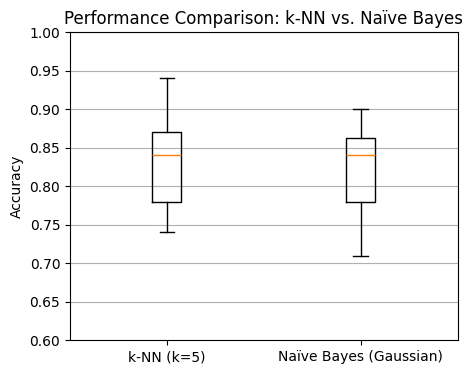

In [32]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
X = df.drop('class', axis=1)
y = df['class']

knn_predictor = KNeighborsClassifier(n_neighbors=5)
nb_predictor = GaussianNB()

# 10-fold stratified cross-validator with shuffling
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

knn_accuracies = []
nb_accuracies = []

# iterate per fold
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    # train and assess k-NN
    knn_predictor.fit(X_train, y_train)
    y_pred = knn_predictor.predict(X_test)
    knn_accuracies.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
    # train and assess Naïve Bayes with Gaussian assumption
    nb_predictor.fit(X_train, y_train)
    y_pred = nb_predictor.predict(X_test)
    nb_accuracies.append(round(metrics.accuracy_score(y_test, y_pred),2))


# plots
plt.figure(figsize=(5, 4))
plt.boxplot([knn_accuracies, nb_accuracies], labels=['k-NN (k=5)', 'Naïve Bayes (Gaussian)'])
plt.title('Performance Comparison: k-NN vs. Naïve Bayes')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1)
plt.grid(axis='y')
plt.show()


b) Using scipy, test the hypothesis “𝑘NN is statistically superior to naïve Bayes regarding 
accuracy”, asserting whether is true.

In [1]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from scipy import stats

# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

X = df.drop('class', axis=1)
y = df['class']

knn_predictor = KNeighborsClassifier(n_neighbors=5)
nb_predictor = GaussianNB()

# 10-fold stratified cross-validator with shuffling
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

knn_accuracies = []
nb_accuracies = []

# iterate per fold
for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    # train and assess k-NN
    knn_predictor.fit(X_train, y_train)
    y_pred = knn_predictor.predict(X_test)
    knn_accuracies.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
    # train and assess Naïve Bayes with Gaussian assumption
    nb_predictor.fit(X_train, y_train)
    y_pred = nb_predictor.predict(X_test)
    nb_accuracies.append(round(metrics.accuracy_score(y_test, y_pred),2))


# 𝑘NN is better than naïve Bayes?
res = stats.ttest_rel(knn_accuracies, nb_accuracies, alternative='greater')
print("𝑘NN > naïve Bayes? pval=",res.pvalue)

𝑘NN > naïve Bayes? pval= 0.1734666237861796


### Comentário:
- 𝑘NN > naïve Bayes? pval= 0.1734666237861796
- como pval > valores de significancia usuais (ou seja, pval é superior a 0.01, 0.05 e 0.1), não é possível rejeitar a hipótese nula e afirmar que o kNN é estatisticamente superior ao Naive Bayes.

# 2.
Consider two 𝑘NN predictors with 𝑘 = 1 and 𝑘 = 5 (uniform weights, Euclidean distance,
all remaining parameters as default). Plot the differences between the two cumulative confusion
matrices of the predictors. Comment.

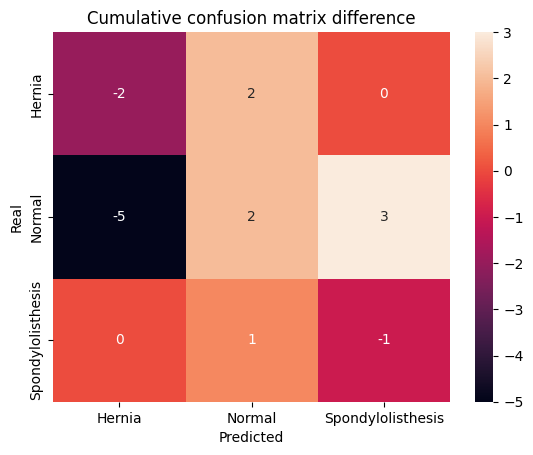

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# reads file, extracts relevant data and initializes relevant variables
data = arff.loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
X = df.drop('class', axis=1)
y = df['class']

knn1, knn5 = KNeighborsClassifier(n_neighbors=1), KNeighborsClassifier(n_neighbors=5)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
cumul_cm_k1, cumul_cm_k5 = np.zeros((3, 3), dtype=int), np.zeros((3, 3), dtype=int)

# performs cross-validation and calculates cumulative confusion matrices 
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # k=1
    knn1.fit(X_train, y_train)
    ypred_k1 = knn1.predict(X_test)
    cm_k1 = confusion_matrix(y_test, ypred_k1)
    cumul_cm_k1 += cm_k1
    # k=5
    knn5.fit(X_train, y_train)
    ypred_k5 = knn5.predict(X_test)
    cm_k5 = confusion_matrix(y_test, ypred_k5)
    cumul_cm_k5 += cm_k5
    
# calculates matrix of difference between both matrixes and labels it
difference = cumul_cm_k1 - cumul_cm_k5
difference = pd.DataFrame(difference, index=['Hernia', 'Normal', 'Spondylolisthesis'], columns=['Hernia', 'Normal', 'Spondylolisthesis'])
# plots the heatmap
sns.heatmap(difference, annot=True, fmt='g')
plt.title('Cumulative confusion matrix difference')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()


### Comentário dos resultados obtidos:
Relativamente aos resultados obtidos, podemos observar que, apesar da diferença não ser muito significativa, o preditor kNN com k=5 apresenta maior precisão a identificar hérnias e casos de "spondylolisthesis" do que o preditor kNN com k=1, sendo que este último é apenas mais preciso a identificar casos normais. 
O classificador com k=1 apresenta mais falsos positivos e falsos negativos para o caso de uma hérnia e para o caso de "spondylolisthesis" do que o classificador com k=5, e este último (k=5) apresenta  mais falsos positivos mas menos falsos negativos para casos normais (do que o classificador k=1).
Globalmente, e como já comentado, os resultados obtidos não diferem muito, mas o classificador k=5 apresenta, expectavelmente, um melhor desempenho e maior precisão do que o classificador k=1.


# 3.
Considering the unique properties of column_diagnosis, identify three possible difficulties
of naïve Bayes when learning from the given dataset.

Com base no dataset fornecido, três possíveis dificuldades do algoritmo de Naive Bayes em aprender com base no mesmo são, primeiramente, a suposição de independência condicional entre as variáveis que caraterizam os dados; neste caso, é bastante possível que existam dependências entre as variáveis, uma vez que três delas incidem sobre a pélvis, por exemplo, e existe possivelmente mais dependências entre estas variáveis - logo, daqui pode advir uma perda de precisão. 
De seguida, outro problema que pode enfrentar é desequilíbrio entre classes, uma vez que, por exemplo, a classe Spondylolisthesis apresenta maior frequência relativa (mais do dobro do que a classe hérnia, e 50% mais do que a classe normal), a classe normal apresenta maior frequência relativa que a classe hérnia mas menos que a Spondylolisthesis, e a classe hérnia apresenta menos frequência relativa que ambas (existem 150 registos da classe Spondylolisthesis, 100 da classe normal e 60 da classe hérnia), o que pode levar o modelo a ter menor precisão que o desejado para classes com menor frequência, e potencialmente a ter um viés para classes com maior frequência.
Por fim (e apesar desta dificuldade parecer ser talvez a menos preocupante ou não tão relevante), a abordagem de Naive Bayes também é suscetível a outliers, que podem influenciar o cálculo das estimativas de probabilidade e consequentemente a precisão do modelo para cada classe e em geral.